In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import numpy as np
np.set_printoptions(suppress=True)
from datetime import datetime
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.float_format', lambda x: '%7f' % x)

In [204]:
df = pd.read_csv(r'C:\Users\kentj\Desktop\Coursera\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100000,2015,137999939.280026,348161292.489031
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300000,2015,101199955.472019,271619025.407628
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500000,2015,183999919.040035,1902723129.801820
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300000,2015,174799923.088033,1385748801.470520


In [36]:
df.shape

(10866, 21)

# Research Question  
1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues? Does higher budget films receive higher revenue? Or does the higher voted score films have the higher revenue?
3. How has the revenue, vote_average and the popularity of movies span across the years?

## Research Question 1 
1. 1. Which genres are most popular from year to year?

In [60]:
df['genres'].value_counts()

Comedy                                                 712
Drama                                                  712
Documentary                                            312
Drama|Romance                                          289
Comedy|Drama                                           280
Comedy|Romance                                         268
Horror|Thriller                                        259
Horror                                                 253
Comedy|Drama|Romance                                   222
Drama|Thriller                                         138
Comedy|Family                                          102
Action|Thriller                                        101
Thriller                                                93
Drama|Comedy                                            92
Animation|Family                                        90
Crime|Drama|Thriller                                    81
Crime|Drama                                             

In [118]:
df['genres'] = df['genres'].str.split('|')

In [119]:
df1 = df.explode('genres')
df1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100000,2015,137999939.280026,348161292.489031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery,Mosfilm,1/1/66,11,6.500000,1966,0.000000,0.000000
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Comedy,Mosfilm,1/1/66,11,6.500000,1966,0.000000,0.000000
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action,Benedict Pictures Corp.,11/2/66,22,5.400000,1966,0.000000,0.000000
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Comedy,Benedict Pictures Corp.,11/2/66,22,5.400000,1966,0.000000,0.000000


In [120]:
df1['genres'].value_counts()

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

In [135]:
df2 = df1.groupby('genres')[['popularity']].mean().reset_index().sort_values(by = 'popularity', ascending = False)
df2

,genres,popularity
1,Adventure,1.154259
15,Science Fiction,1.001218
8,Fantasy,0.992840
0,Action,0.926136
2,Animation,0.852182
7,Family,0.786668
4,Crime,0.744821
17,Thriller,0.741513
18,War,0.727683
13,Mystery,0.690012


<AxesSubplot:xlabel='popularity', ylabel='genres'>

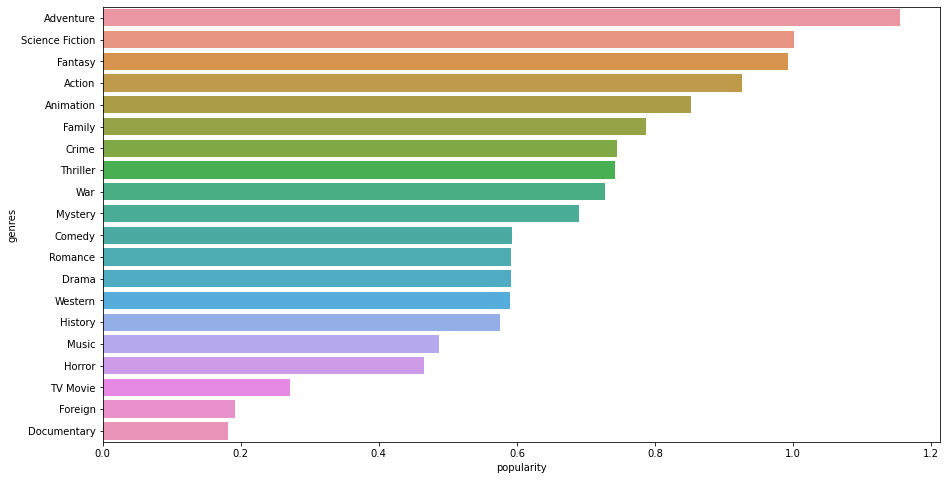

In [136]:
fig, ax = plt.subplots(1, figsize = (15,8))
sns.barplot(x = 'popularity', y = 'genres', data = df2, order = df2['genres'])

Comments: Adventure is the most popular genres in 2010


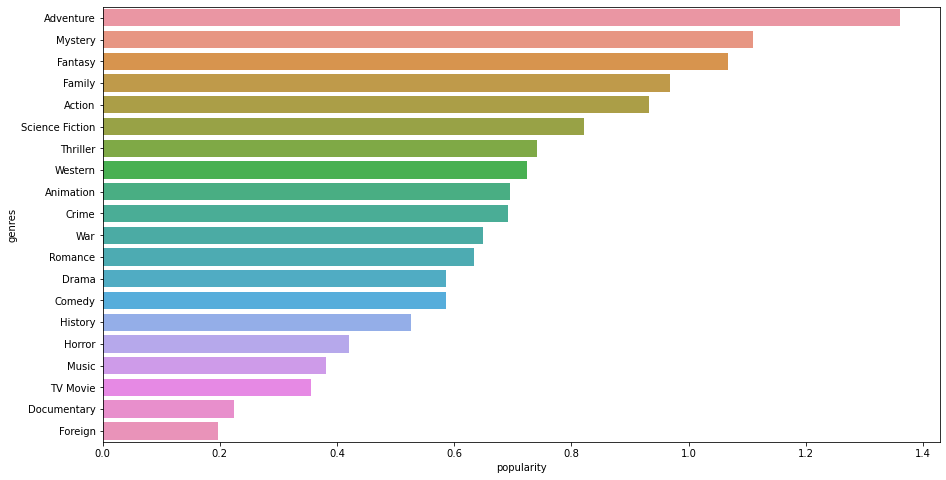

In [156]:
year_2010 = df1[df1['release_year'] == 2010]
year_2011 = df1[df1['release_year'] == 2011]
year_2012 = df1[df1['release_year'] == 2012]
year_2013 = df1[df1['release_year'] == 2013]
year_2014 = df1[df1['release_year'] == 2014]
year_2015 = df1[df1['release_year'] == 2015] 

year_2010 = year_2010.groupby(['release_year','genres'])['popularity'].mean().reset_index().sort_values(by = 'popularity', ascending = False)

fig, ax = plt.subplots(1, figsize = (15,8))
sns.barplot(x = 'popularity', y = 'genres', data = year_2010)

print('Comments: Adventure is the most popular genres in 2010')

Comments: Western is the most popular genres in 2011


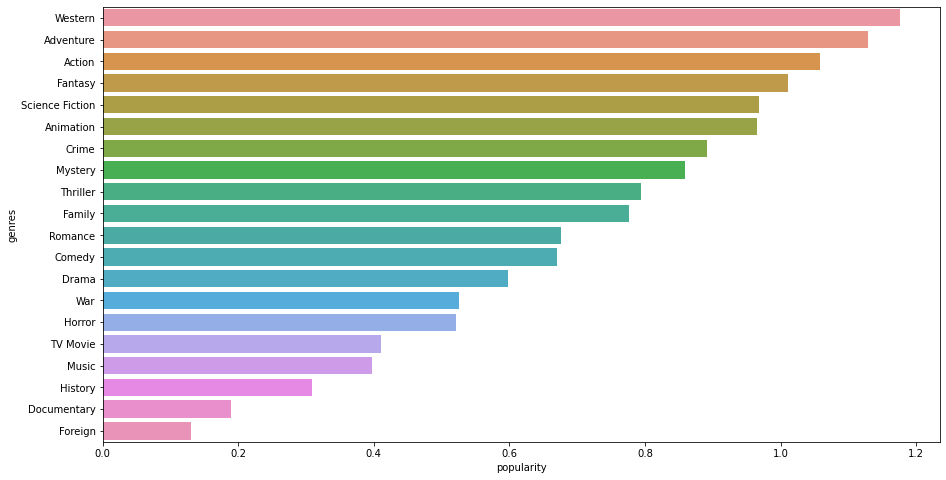

In [157]:
year_2011 = year_2011.groupby(['release_year','genres'])['popularity'].mean().reset_index().sort_values(by = 'popularity', ascending = False)

fig, ax = plt.subplots(1, figsize = (15,8))
sns.barplot(x = 'popularity', y = 'genres', data = year_2011)
print('Comments: Western is the most popular genres in 2011')

Comments: Western is the most popular genres in 2012 


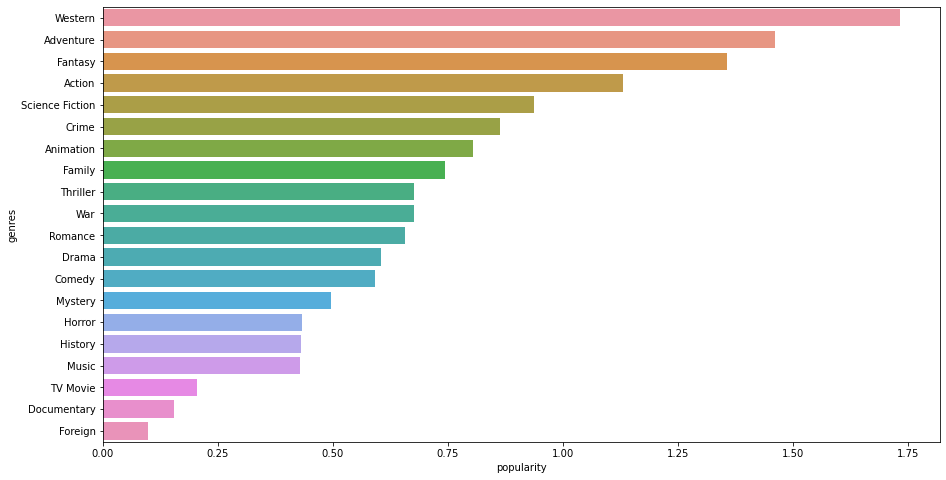

In [158]:
year_2012 = year_2012.groupby(['release_year','genres'])['popularity'].mean().reset_index().sort_values(by = 'popularity', ascending = False)

fig, ax = plt.subplots(1, figsize = (15,8))
sns.barplot(x = 'popularity', y = 'genres', data = year_2012)
print('Comments: Western is the most popular genres in 2012 ')

Comments: Western is the most popular genres in 2013 


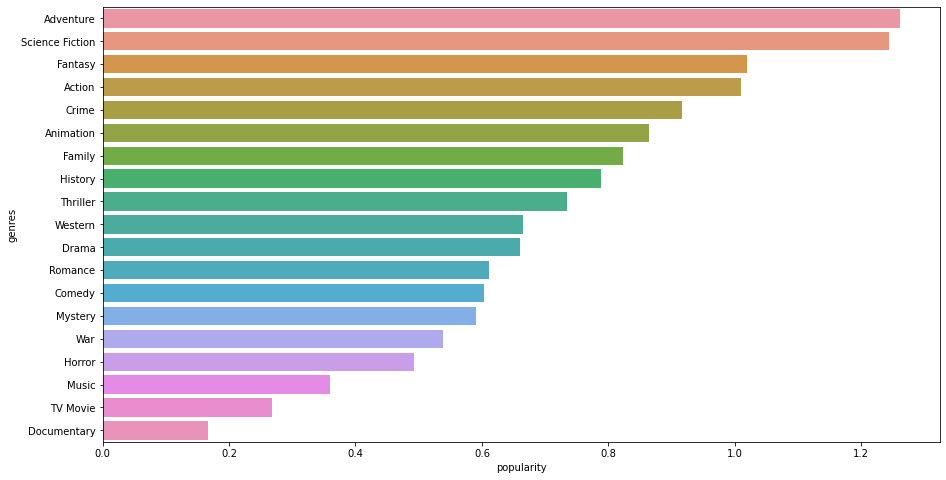

In [159]:
year_2013 = year_2013.groupby(['release_year','genres'])['popularity'].mean().reset_index().sort_values(by = 'popularity', ascending = False)

fig, ax = plt.subplots(1, figsize = (15,8))
sns.barplot(x = 'popularity', y = 'genres', data = year_2013)
print('Comments: Adventure is the most popular genres in 2013 ')

Comments: Adventure is the most popular genres in 2014 


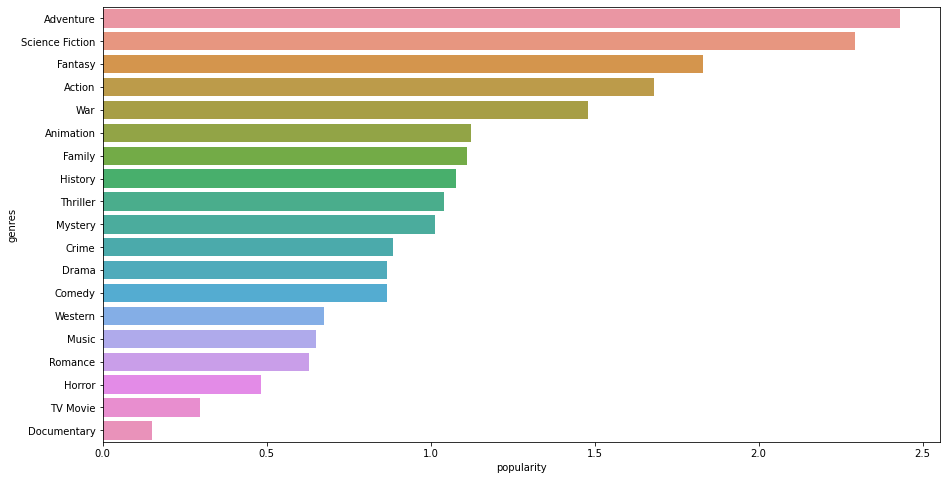

In [160]:
year_2014 = year_2014.groupby(['release_year','genres'])['popularity'].mean().reset_index().sort_values(by = 'popularity', ascending = False)

fig, ax = plt.subplots(1, figsize = (15,8))
sns.barplot(x = 'popularity', y = 'genres', data = year_2014)
print('Comments: Adventure is the most popular genres in 2014 ')

Comments: Adventure is the most popular genres in 2015 


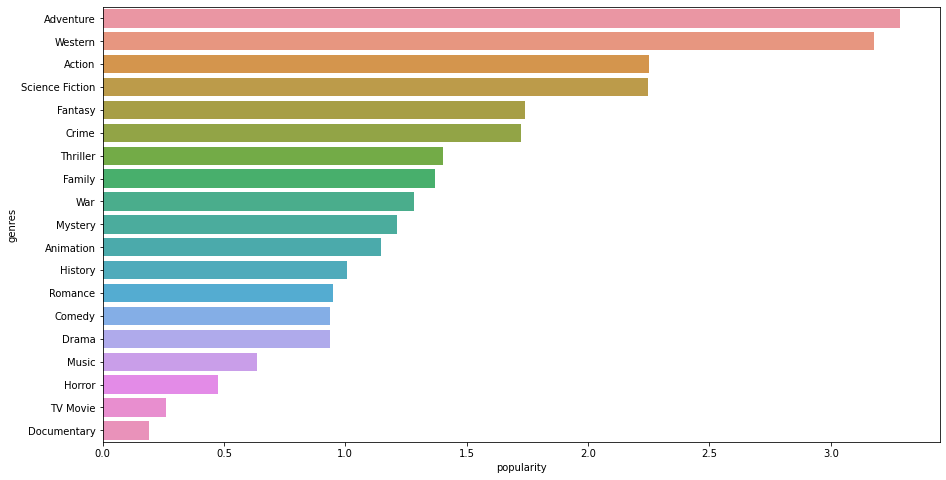

In [161]:
year_2015 = year_2015.groupby(['release_year','genres'])['popularity'].mean().reset_index().sort_values(by = 'popularity', ascending = False)

fig, ax = plt.subplots(1, figsize = (15,8))
sns.barplot(x = 'popularity', y = 'genres', data = year_2015)
print('Comments: Adventure is the most popular genres in 2015 ')

# Research Question 2
What kinds of properties are associated with movies that have high revenues? Does higher budget films receive higher revenue? Or does the higher voted score films have the higher revenue?

In [162]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100000,2015,137999939.280026,348161292.489031
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300000,2015,101199955.472019,271619025.407628
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500000,2015,183999919.040035,1902723129.801820
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300000,2015,174799923.088033,1385748801.470520


In [163]:
df['budget'].isnull().sum()

0

In [164]:
df['revenue'].isnull().sum()

0

<AxesSubplot:xlabel='budget', ylabel='revenue'>

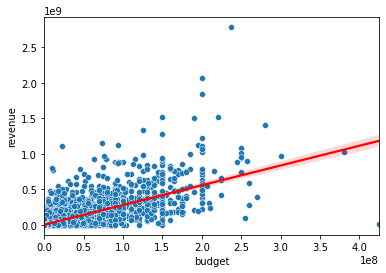

In [167]:
ax = sns.scatterplot(data=df, x="budget", y='revenue')
sns.regplot(data=df,  x="budget", y='revenue', scatter=False, ax=ax, color = 'red') 
#There is a positve correlation between budget and revenue, however, note that this is a correlation, and not a causation 

In [169]:
df['vote_average'].isnull().sum()

0

<AxesSubplot:xlabel='vote_average', ylabel='revenue'>

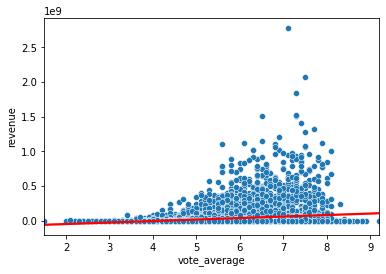

In [171]:
ax = sns.scatterplot(data=df, x="vote_average", y='revenue')
sns.regplot(data=df,  x="vote_average", y='revenue', scatter=False, ax=ax, color = 'red') 
#it does seem to suggest some correlation, but not very strongly. 

In [173]:
df['popularity'].isnull().sum()

0

<AxesSubplot:xlabel='popularity', ylabel='revenue'>

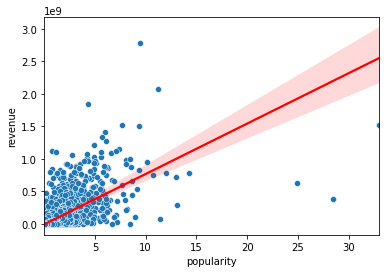

In [174]:
ax = sns.scatterplot(data=df, x="popularity", y='revenue')
sns.regplot(data=df,  x="popularity", y='revenue', scatter=False, ax=ax, color = 'red') 
#Higher popularity seems to be correlated to higher revenues

## Research Question 3 
3. How has the revenue, vote_average and the popularity of movies span across the years?

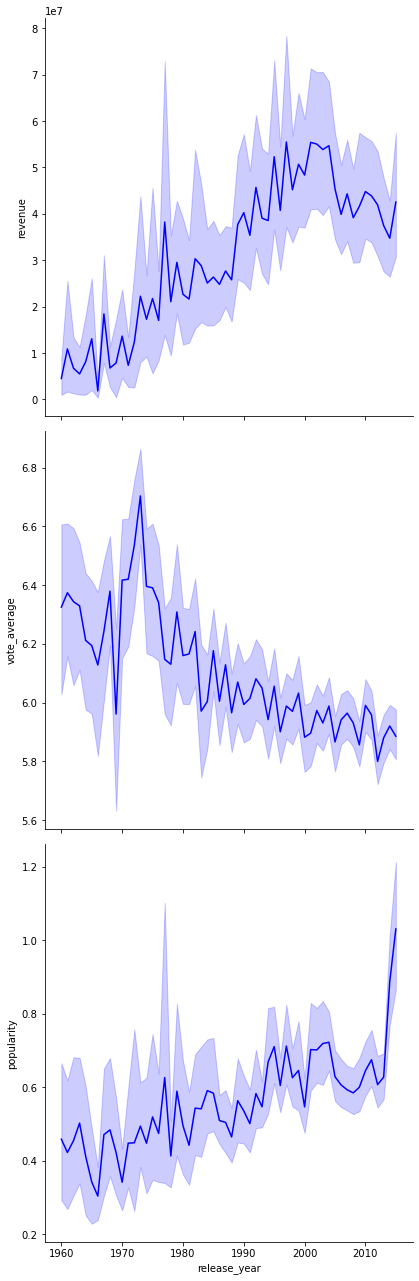

In [185]:
g = sns.PairGrid(df, y_vars=["revenue", "vote_average", "popularity"], x_vars= "release_year", height=6)
g.map(sns.lineplot, color="blue")

# Comments: 
1. Its very interesting to note, revenue increase along the years. 
2. movie vote average had a downwards trend, this seem to suggest that people are getting more critic towards movie as time passed. 
3. Popularity has also been rising throughout the years. 

# Additional Question: 
1.  Has the number movie produced increased or decreased over the years? Plot the number of movies produced acrossed the years

In [189]:
df1 = df.groupby('release_year')['id'].count().reset_index()
df1

,release_year,id
0,1960,32
1,1961,31
2,1962,32
3,1963,34
4,1964,42
5,1965,35
6,1966,46
7,1967,40
8,1968,39
9,1969,31


<AxesSubplot:xlabel='release_year', ylabel='id'>

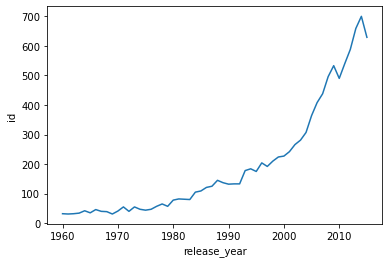

In [190]:
sns.lineplot(x = 'release_year', y = 'id', data = df1)

#evidently, number of movies have been increasing along the years. 

In [205]:
df['genres'] = df['genres'].astype(str)
df['genres'] = df['genres'].str.split('|')

In [206]:
df['genres']

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2                [Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
                              ...                      
10861                                     [Documentary]
10862                        [Action, Adventure, Drama]
10863                                 [Mystery, Comedy]
10864                                  [Action, Comedy]
10865                                          [Horror]
Name: genres, Length: 10866, dtype: object

In [207]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df_genres = pd.DataFrame(mlb.fit_transform(df['genres']),columns=mlb.classes_)

df_genres

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,nan
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10862,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10863,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10864,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [208]:
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'nan'], dtype=object)

In [211]:
df_new = pd.concat([df, df_genres], axis = 1)
df_new.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,nan
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100000,2015,137999939.280026,348161292.489031,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300000,2015,101199955.472019,271619025.407628,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500000,2015,183999919.040035,1902723129.801820,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300000,2015,174799923.088033,1385748801.470520,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Statistical Breakdown of genres 

In [230]:
df_genre_sum = df_genres.sum().reset_index().sort_values(by = 0, ascending = False)

df_genre_sum = df_genre_sum.rename(columns={"index": "genre", 0: 'count'})

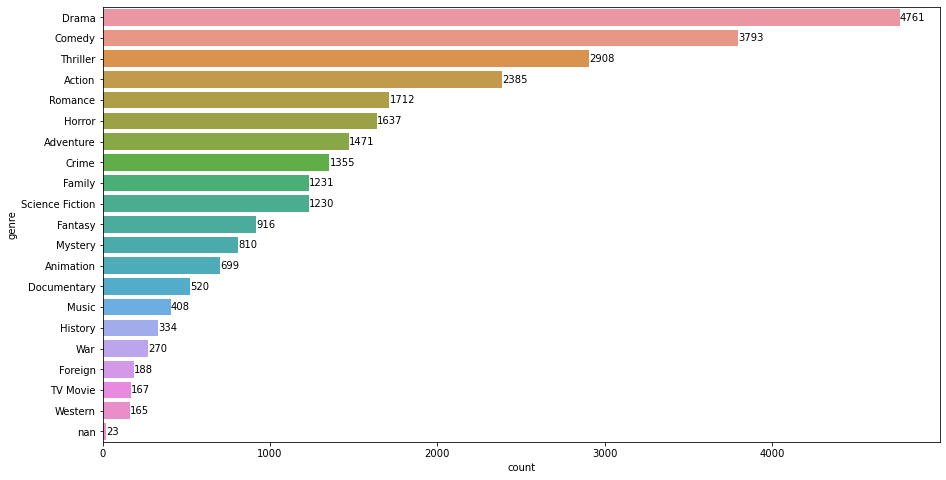

In [233]:
fig, ax = plt.subplots(1, figsize = (15,8))
sns.barplot(x = 'count', y = 'genre', data = df_genre_sum)

for p in ax.patches:
    width = p.get_width()   
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width), 
            ha = 'left',  
            va = 'center')

# Comments 
From the producer point of view, Drama, Comedy and Thriller seems to be the most popular genres to be produced in the movies.